# **Case Study: How Does a Bike-Share Navigate Speedy Success?
**Introduction

This case study is about Capstone project requirement for Google Data Analytics Professional Certificate. It involves a *fictional* bike-share company's data of its customer's trip details over a 12 month period in the year of 2021.


**About the company

Cyclistic, A fictional bike-share program that features many bicycles and docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, it is  believed that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, also there is a very good chance to convert casual riders into members. Because casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Cyclistic has a clear goal; design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Cyclistic is interested in analyzing the Cyclistic historical bike trip data to identify trends.




**Processes for data analysis phases:

1-ASK

-How do annual members and casual riders use Cyclistic bikes differently?
-What is the difference between annual members and casual riders?
-Why casual riders would buy a membership?

2-PREPARE

I am using Divvy bike data sourced from the [Divvy Bike website](https://divvy-tripdata.s3.amazonaws.com/index.html)

The data was organized by month and saved as .csv files within .zip files, I downloaded each month to my local computer it was almost 1GB in total. I combined 12 months data to 1 csv file with a python script.(combined_csv.csv)

The data has following attributes:
ride_id : a unique ID per ride
rideable_type: the type of bicycle
started_at: the date and time that the bicycle was taken
ended_at: the date and time that the bicycle was dropped
start_station_name: the name of start station
start_station_id: a unique ID for the start station
end_station_name: the name of the end station
end_station_id : a unique ID for the end station
start_lat: the latitude of the start station
start_lng: the longitude of the start station
end_lat: the latitude of the end station
end_lng: the longitude of the end station
member_casual: the type of membership


The data source is reliable, original, comprehensive, current and cited. The data has been made available under this [license] (https://ride.divvybikes.com/data-license-agreement).



3-PROCESS

All 2021 data was very big, I downloaded it to my local pc and combined them in to one .csv file with a python script. 
Checked for duplicates, there was none. 
In total there are: 5595064 rows Then .csv file is uploaded to kaggle. 



In [1]:
# To start off the analysis, we need to install and load the relevant R packages

# Install Packages
#install.packages("tidyverse",repos = "http://cran.us.r-project.org")
getwd()

# Load packages
library(tidyverse)  
library(lubridate)  
library(ggplot2)

[1] "/kaggle/working"

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# Load data and set working directory setwd()
setwd("../input/combined-csv")

m1_2021 <- read_csv("combined_csv.csv")

Rows: 5595063 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [3]:
colnames(m1_2021)
summary(m1_2021)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

   ride_id          rideable_type        started_at                 
 Length:5595063     Length:5595063     Min.   :2021-01-01 00:02:05  
 Class :character   Class :character   1st Qu.:2021-06-06 23:52:40  
 Mode  :character   Mode  :character   Median :2021-08-01 01:52:11  
                                       Mean   :2021-07-29 07:41:02  
                                       3rd Qu.:2021-09-24 16:36:16  
                                       Max.   :2021-12-31 23:59:48  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-01-01 00:08:39   Length:5595063     Length:5595063    
 1st Qu.:2021-06-07 00:44:21   Class :character   Class :character  
 Median :2021-08-01 02:21:55   Mode  :character   Mode  :character  
 Mean   :2021-07-29 08:02:58                                        
 3rd Qu.:2021-09-24 16:54:05                                        
 Max.   :2022-01-03 17:32:18      

4-ANALYZE

Added New Columns

* date
* day_of_week
* day
* month
* ride_length


In [4]:
# Added new columns 
#date, month and day of week 

m1_2021$date <- as.Date(m1_2021$started_at) 
m1_2021$month <- format(as.Date(m1_2021$date), "%m")
m1_2021$day_of_week <- format(as.Date(m1_2021$date), "%A")
m1_2021$month <- format(as.Date(m1_2021$date), "%B")

# Added ride_length" calculation (in seconds)
m1_2021$ride_length <- difftime(m1_2021$ended_at,m1_2021$started_at)

In [5]:
#Check the structure of new data frame
str(m1_2021)

spec_tbl_df [5,595,063 × 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5595063] "E19E6F1B8D4C42ED" "DC88F20C2C55F27F" "EC45C94683FE3F27" "4FA453A75AE377DB" ...
 $ rideable_type     : chr [1:5595063] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:5595063], format: "2021-01-23 16:14:19" "2021-01-27 18:43:08" ...
 $ ended_at          : POSIXct[1:5595063], format: "2021-01-23 16:24:44" "2021-01-27 18:47:12" ...
 $ start_station_name: chr [1:5595063] "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" "California Ave & Cortez St" ...
 $ start_station_id  : chr [1:5595063] "17660" "17660" "17660" "17660" ...
 $ end_station_name  : chr [1:5595063] NA NA NA NA ...
 $ end_station_id    : chr [1:5595063] NA NA NA NA ...
 $ start_lat         : num [1:5595063] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:5595063] -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           :

In [6]:
# Converted "ride_length" to numeric
m1_2021$ride_length <- as.numeric(as.character(m1_2021$ride_length))
is.numeric(m1_2021$ride_length)

# Remove negative ride lenghts and create a new workable data frame all_trips 
all_trips <- m1_2021[!(m1_2021$ride_length<0),]

# Summary analysis
summary(all_trips$ride_length)

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     405     720    1316    1307 3356649 

In [7]:
# summary by member type
aggregate(all_trips$ride_length ~ all_trips$member_casual, FUN = mean)
aggregate(all_trips$ride_length ~ all_trips$member_casual, FUN = median)
aggregate(all_trips$ride_length ~ all_trips$member_casual, FUN = max)
aggregate(all_trips$ride_length ~ all_trips$member_casual, FUN = min)


all_trips$member_casual,all_trips$ride_length
<chr>,<dbl>
casual,1920.1327
member,818.0129


all_trips$member_casual,all_trips$ride_length
<chr>,<dbl>
casual,958
member,576


all_trips$member_casual,all_trips$ride_length
<chr>,<dbl>
casual,3356649
member,93596


all_trips$member_casual,all_trips$ride_length
<chr>,<dbl>
casual,0
member,0


In [8]:
# Set order of days of week and month
all_trips$day_of_week <- ordered(all_trips$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
all_trips$month <- ordered(all_trips$month, levels=c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))

# Average ride time by day of week and member
aggregate(all_trips$ride_length ~ all_trips$member_casual + all_trips$day_of_week, FUN = mean)

# Average ride time by month and member
aggregate(all_trips$ride_length ~ all_trips$member_casual + all_trips$month, FUN = mean)

all_trips$member_casual,all_trips$day_of_week,all_trips$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,2253.9949
member,Sunday,939.4763
casual,Monday,1912.5269
member,Monday,794.8517
casual,Tuesday,1678.3396
member,Tuesday,767.2874
casual,Wednesday,1659.4383
member,Wednesday,769.1496
casual,Thursday,1662.1955


all_trips$member_casual,all_trips$month,all_trips$ride_length
<chr>,<ord>,<dbl>
casual,January,1541.0754
member,January,772.3387
casual,February,2962.3937
member,February,1081.3251
casual,March,2289.5511
member,March,838.2031
casual,April,2281.3794
member,April,881.3527
casual,May,2293.8580


In [9]:
# analyze by ridership type and weekday by creating weekday field and calculating 
# number of rides and average duration
all_trips %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  
  group_by(member_casual, weekday) %>%  
  summarise(number_of_rides = n()							
            ,average_duration = mean(ride_length)) %>% 		
  arrange(member_casual, weekday)	

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,481104,2253.9949
casual,Mon,286373,1912.5269
casual,Tue,274388,1678.3396
casual,Wed,278948,1659.4383
casual,Thu,286064,1662.1955
casual,Fri,364075,1820.9160
casual,Sat,557994,2082.3740
member,Sun,376117,939.4763
member,Mon,416204,794.8517


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



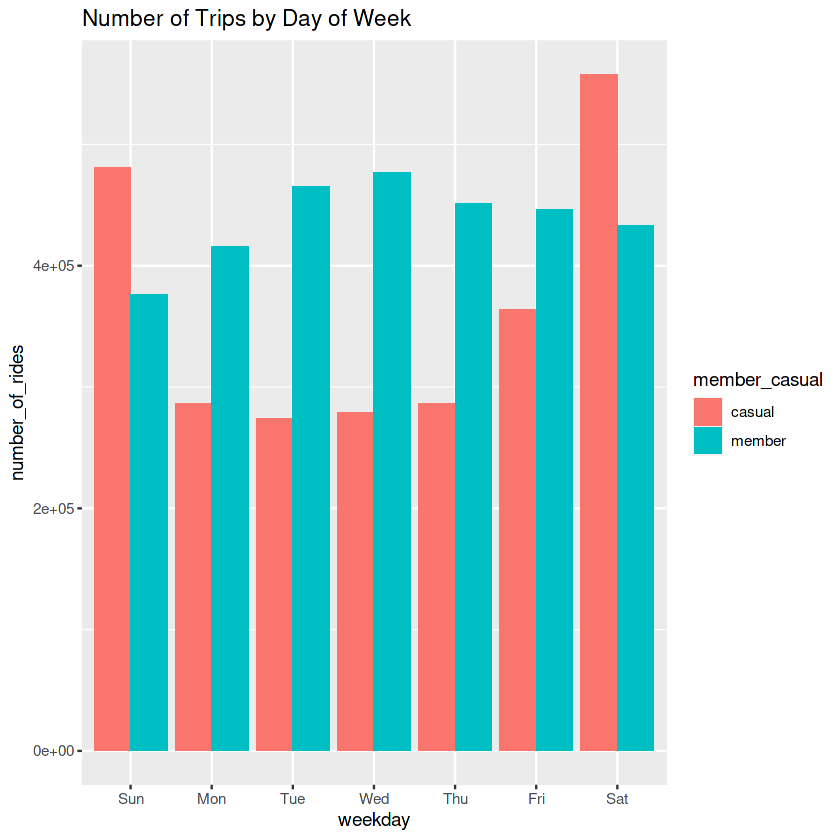

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



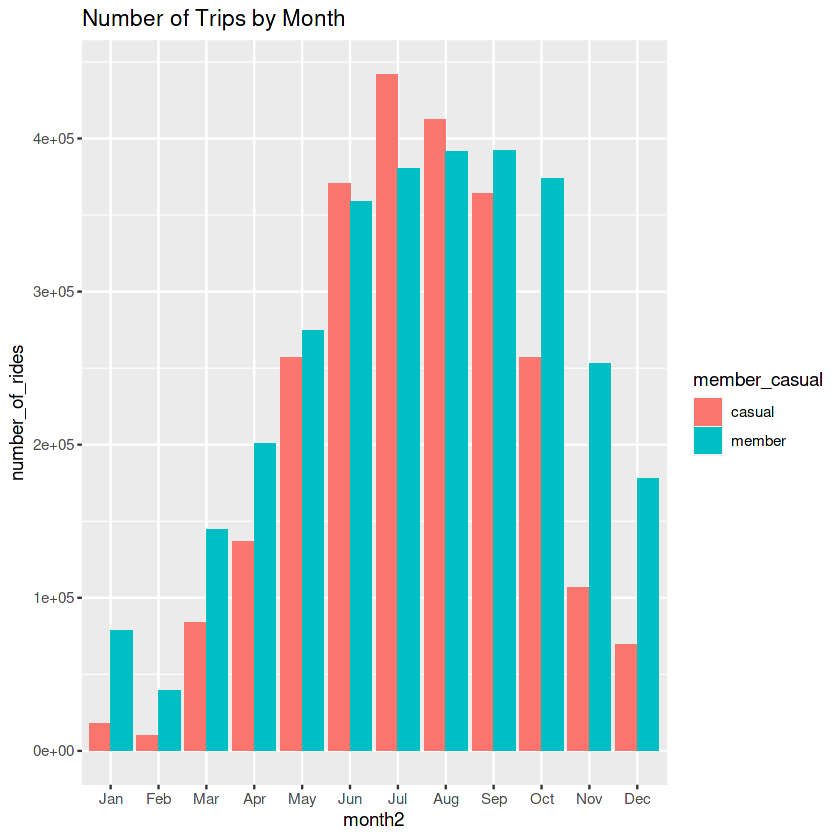

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



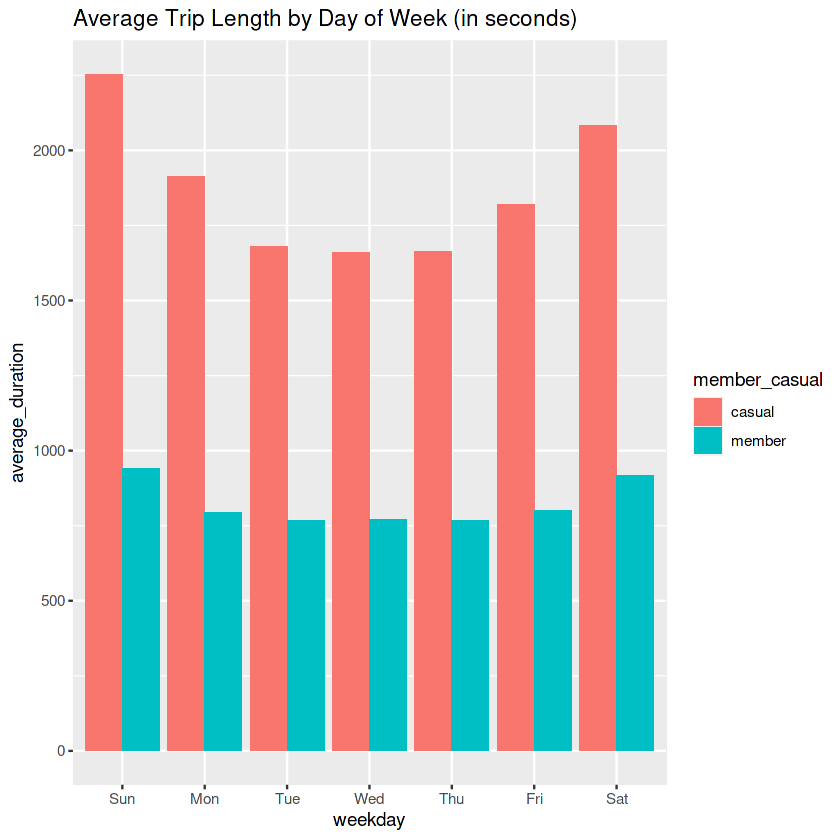

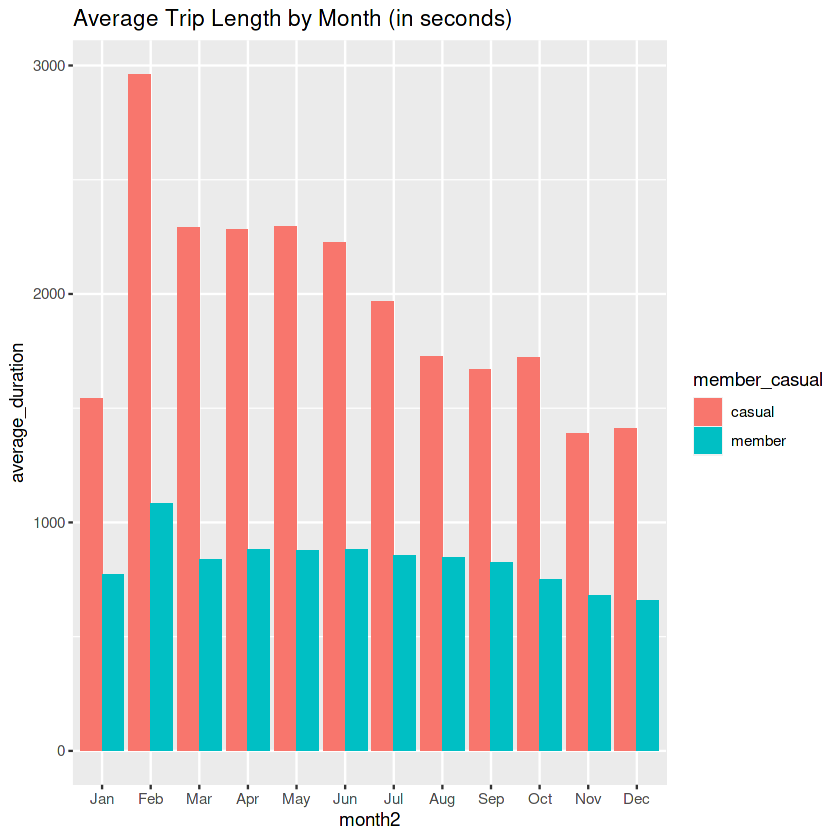

In [10]:
# visualize the number of rides by rider type and day of week
setwd("/kaggle/working")
all_trips %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of Trips by Day of Week")

# visualize the number of rides by rider type and month
all_trips %>% 
  mutate(month2 = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month2) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month2)  %>% 
  ggplot(aes(x = month2, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of Trips by Month")

# visualize average duration by day of week
all_trips %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Average Trip Length by Day of Week (in seconds)")

# visualize average duration by month
all_trips %>% 
  mutate(month2 = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month2) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month2)  %>% 
  ggplot(aes(x = month2, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Average Trip Length by Month (in seconds)")